In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [6]:
china1965 = pd.read_csv('03_03/income-1965-china.csv')
china2015 = pd.read_csv('03_03/income-2015-china.csv')
usa1965 = pd.read_csv('03_03/income-1965-usa.csv')
usa2015 = pd.read_csv('03_03/income-2015-usa.csv')

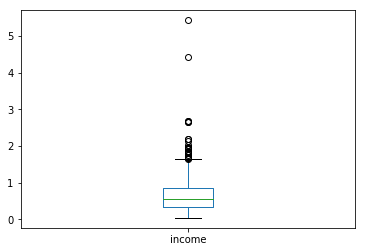

In [7]:
china1965.income.plot(kind='box')

In [9]:
# Pandas kind box box 25th 75th Quantiles Whisker are set at 150 66%
# respectively of the whiskers. Points above and below the whiskers are
# not typical and they may be considered outliersi.e. suspicous or 
# errors.

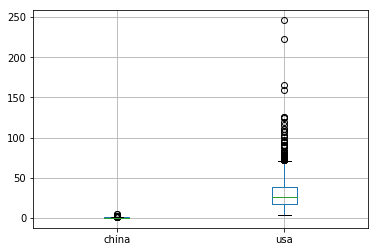

In [10]:
pd.DataFrame({'usa': usa1965.income, 'china': china1965.income}).boxplot()

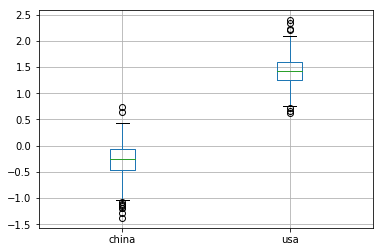

In [12]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

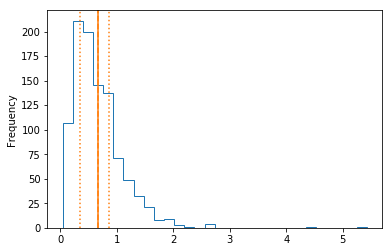

In [16]:
china1965.income.plot(kind='hist', histtype='step', bins=30)

pp.axvline(china1965.income.mean(), c='C1')
pp.axvline(china1965.income.mean(), c='C1', linestyle='--')
pp.axvline(china1965.income.quantile(0.25), c='C1', linestyle=':')
pp.axvline(china1965.income.quantile(0.75), c='C1', linestyle=':')

(0, 3, 0.0, 1.2342999882944068)

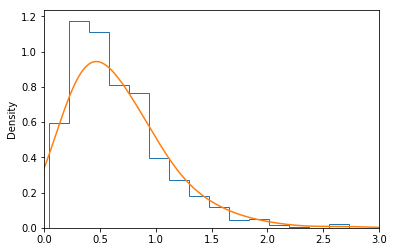

In [21]:
china1965.income.plot(kind='hist', histtype='step', bins=30, density=True)
china1965.income.plot.density(bw_method=0.5) #bend with optional

pp.axis(xmin=0, xmax=3)

([<matplotlib.axis.XTick at 0x10f422dd8>,
 <a list of 9 Text xticklabel objects>)

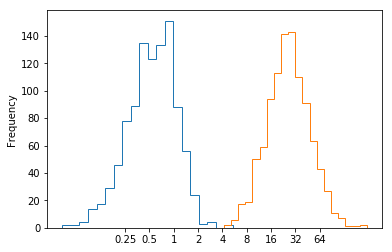

In [27]:
china1965.log10_income.plot.hist(histtype='step', bins=20)
usa1965.log10_income.plot.hist(histtype='step', bins=20)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

([<matplotlib.axis.XTick at 0x110afb7f0>,
 <a list of 9 Text xticklabel objects>)

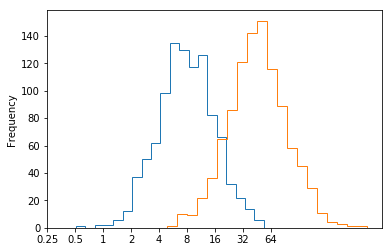

In [28]:
china2015.log10_income.plot.hist(histtype='step', bins=20)
usa2015.log10_income.plot.hist(histtype='step', bins=20)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

In [29]:
gapminder = pd.read_csv('03_03/gapminder.csv')

In [30]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)

In [31]:
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [33]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [34]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

([<matplotlib.axis.XTick at 0x110bc1f98>,
 <a list of 9 Text xticklabel objects>)

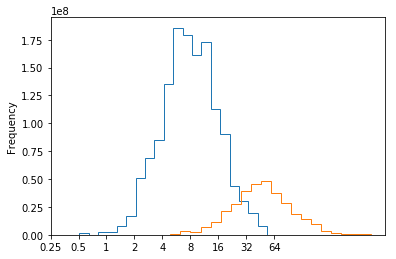

In [35]:
china2015.log10_income.plot.hist(histtype='step', bins=20, weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step', bins=20, weights=usa2015.weight)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

In [36]:
# Rosling points out there is a lot of purchasing power on the richer end
# of the chinese population. Where it overlaps with US.